# 12주차 과제_0519(월)

딥러닝 파이토치 교과서 ch5. 2 p.179~200

# 5.2 합성곱 신경망 맛보기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST('/content/drive/MyDrive/ESAA/25-1 OB 세션/datasets', download = 'True',
                                                  transform = transforms.Compose([transforms.ToTensor()]))

test_dataset = torchvision.datasets.FashionMNIST('/content/drive/MyDrive/ESAA/25-1 OB 세션/datasets', download = 'True',
                                                 train = False, transform = transforms.Compose([transforms.ToTensor()]))

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 278kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.00MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.13MB/s]


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100)

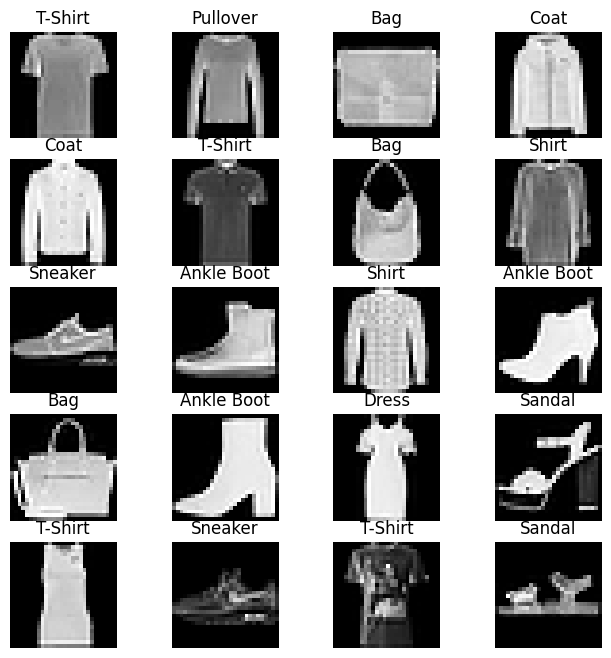

In [ ]:
# 분류에 사용될 클래스 정의
lables_map = {0 :'T-Shirt', 1 :'Trouser', 2 :'Pullover', 3 :'Dress', 4 :'Coat',
              5 :'Sandal', 6 :'Shirt', 7 :'Sneaker', 8 :'Bag', 9 :'Ankle Boot'}

fig = plt.figure(figsize = (8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows + 1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
plt.show()

- np.random : 무작위로 데이터 생성

- np.random.randint() : 이산형 분포를 갖는 데이터에서 무작위 표본 추출시 사용

In [ ]:
# 심층 신경망 모델 생성
class FashionDNN(nn.Module) :
    def __init__(self) :
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features = 784, out_features = 256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features = 256, out_features = 128)
        self.fc3 = nn.Linear(in_features = 128, out_features = 10)

    def forward(self, input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

<Note : 객체>

객체 지향 프로그래밍 :  프로그래밍에서 필요한 데이터를 추상화하여 속성이나 행동, 동작, 특징 등을 객체로 만들고 그 객체들이 서로 유기적으로 동작하도록 하는 프로그래밍 방법

    객체명 = 클래스명()

<Note : 클래스와 함수>

함수 : 하나의 특정 작업을 수행하기 위해 독립적으로 설계된 프로그램 코드

함수 호출은 특정 작업 수행뿐만 아니라 그 결괏값을 사용하기 위해 값을 저장해야함

함수뿐만 아니라 관련된 변수까지도 한꺼번에 묶어서 관리하고 재사용할 수 있게 해주는 것이 **클래스**

* forward() 함수 : 모델이 학습 데이터를 입력 받아서 순전파 학습을 진행시키며 무조건 forward라는 이름의 함수여야 함

* view() : 넘파이의 reshape과 같은 역할, 텐서의 크기 변경

* 활성화 함수 지정 방법

1. F.relu() : forward() 함수에서 정의

2. nn.ReLU() : __init__() 함수에서 정의


```
# nn 사용
import torch
import torch..nn as nn

inputs = torch.randn(64, 3, 244, 244)
conv = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, padding = 1)
outputs = conv(inputs)
layer = nn.Conved(1, 1, 3)

# nn.functional 사용
import torch.nn.functional as F

inputs = torch.randn(64, 3, 244, 244)
weight = torch.randn(64, 3, 3, 3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding = 1)
```

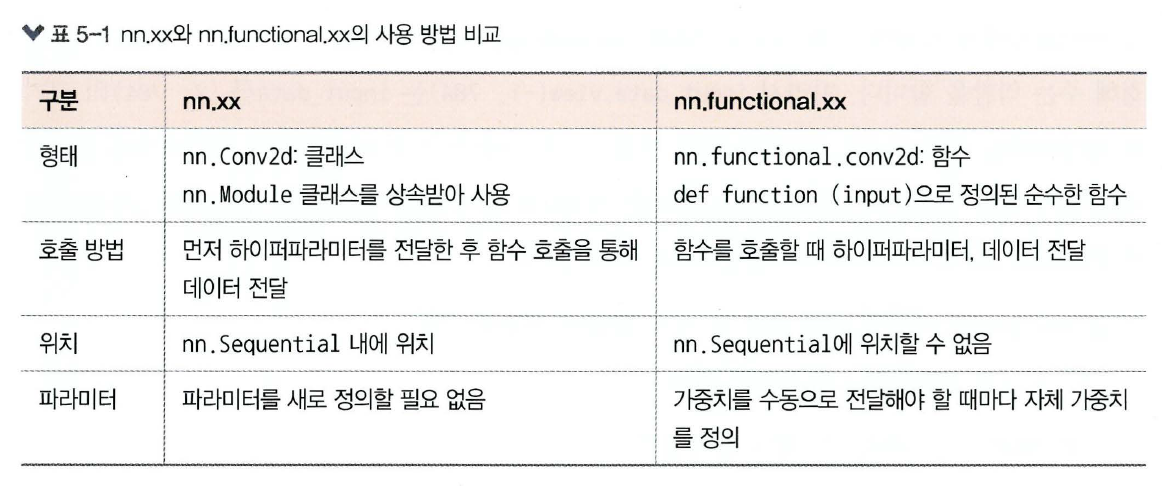

In [ ]:
# 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001;
model = FashionDNN();
model.to(device)

criterion = nn.CrossEntropyLoss(); # 분류 문제에서 사용하는 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate);
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# 심층 신경망을 이용한 모델 학습
num_epochs = 5
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)   # 학습 데이터를 모델에 적용
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):    # count를 50으로 나누었을 때 나머지가 0이 아니라면 실행
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)

                test = Variable(images.view(100, 1, 28, 28))

                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)

            accuracy = correct * 100 / total   # (5)
            loss_list.append(loss.data)        # (1')
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.6026259660720825, Accuracy: 83.44000244140625%
Iteration: 1000, Loss: 0.5011597275733948, Accuracy: 84.55999755859375%
Iteration: 1500, Loss: 0.37092575430870056, Accuracy: 84.75%
Iteration: 2000, Loss: 0.3357752859592438, Accuracy: 85.70999908447266%
Iteration: 2500, Loss: 0.2543281316757202, Accuracy: 86.26000213623047%
Iteration: 3000, Loss: 0.2649131417274475, Accuracy: 87.25%


분류 문제에서 클래스가 세 개 이상일 때 주의해야할 점

- 정확도가 80% 이상일 때 80%라는 값이 모든 클래스가 동등하게 고려된 것인지, 특정 클래스의 분류가 높았던 것인지 알 수 없음

- 정확도가 90% 이상이라도 100개의 데이터 중 90개가 하나의 클래스에 속할 경우에는 정확도가 높다고 할 수 없음

In [ ]:
# 합성곱 네트워크 생성
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)   # (5)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)   # 마지막 계층의 out_features는 클래스 개수를 의미

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

채널

3차원의 경우 채널은 깊이를 의미

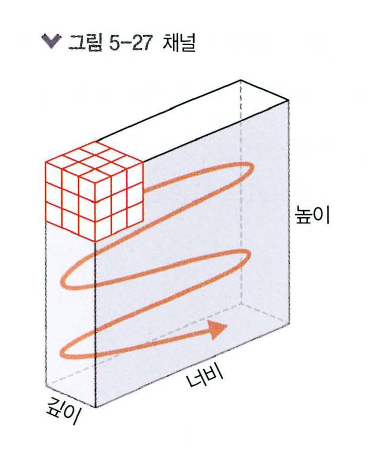

BatchNorm2d

학습 과정에서 각 배치 단위별로 데이터가 다양한 분포를 가지더라도 평균과 분산을 이용하여 정규화하는 것

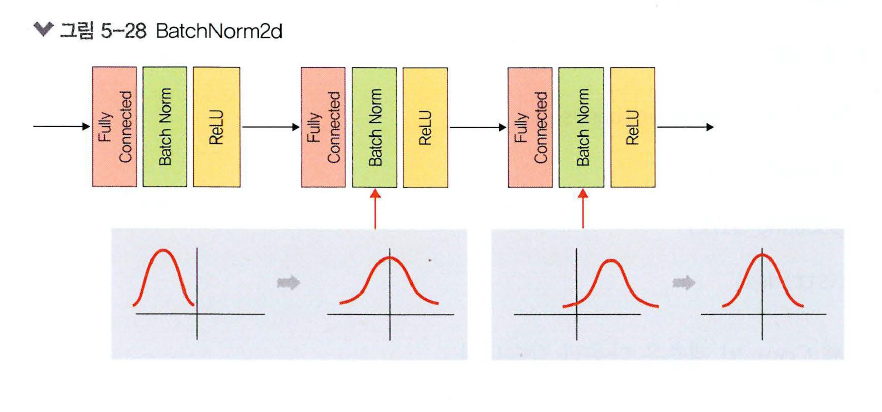

배치 단위나 계층에 따라 입력 값의 분포가 모두 다르지만 정규화를 통해 가우시안 평태로 만듬. 평균은 0, 표준편차는 1로 데이터 분포가 조정됨

MaxPool2d : 이미지 크기를 축소시키는 용도로 사용

풀링 계층 : 합성곱층의 출력 데이터를 입력으로 받아서 출력 데이터의 크기를 줄이거나 특정 데이터를 강조

**Conv2d 계층에서의 출력 크기 구하는 공식**

- 출력 크기 = (W-F+2P).S+1

    * W : 입력 데이터의 크기(input_volumn_size)
    * F : 커널 크기(kernel_size)
    * P : 패딩 크기(padding_size)
    * S : 스트라이드(strides)

**MaxPool2d 계층에서의 출력 크기 구하는 공식**

- 출력 크기 = IF/F

    * IF : 입력 필터의 크기
    * F : 커널 크기

In [ ]:
# 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate);
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [ ]:
# 모델 학습 및 성능 평가
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)

                test = Variable(images.view(100, 1, 28, 28))

                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.49883976578712463, Accuracy: 87.8499984741211%
Iteration: 1000, Loss: 0.3013859689235687, Accuracy: 88.08000183105469%
Iteration: 1500, Loss: 0.2541956603527069, Accuracy: 88.54000091552734%
Iteration: 2000, Loss: 0.2099345177412033, Accuracy: 89.47000122070312%
Iteration: 2500, Loss: 0.1565985381603241, Accuracy: 89.91000366210938%
Iteration: 3000, Loss: 0.1797419935464859, Accuracy: 90.29000091552734%
